### パラメータ推定 s1 only

In [1]:
# smoothing maskの方の関数を使う

In [16]:
include("../../src/function/smoothing_masked_main_function.jl");

minimize_r_like_estimate_fast (generic function with 1 method)

In [20]:
using NPZ

cov_mat_scal = npzread("../../covariance_matrix/smoothing_masked_cov_mat_scal.npy")
cov_mat_tens = npzread("../../covariance_matrix/smoothing_masked_cov_mat_tens.npy");

### パラメータセット

In [18]:
nside = 4
r =0.;

In [19]:
# litebirdの周波数を選んで
# 色々なバンドで試す

freq_band_case1 = [40, 68, 100]
freq_band_case2 = [40, 50, 100]
which_model = "s1"
cmb_freq = 100;

In [7]:
# スレッドセーフな計算 push!は使うな

times = 1000

r_array_case1 = zeros(times)
r_array_case2 = zeros(times)

beta_array_case1 = zeros(times)
beta_array_case2 = zeros(times)

accuracy_r, accuracy_like = 1e-5, 1e-2

@time @inbounds for seed in 1:times

    # r_like_estimate_fast(r_ini, num_iterations, random_seed_cmb, seed_syn, nside, r_input, freq_band, which_model, cmb_freq, cov_mat_scal, cov_mat_tens)
    r_array, beta_s_array, beta_d_array, T_d_array, optimum_r1, optimum_beta_s1, optimum_beta_d1, optimum_T_d1 = minimize_r_like_estimate_fast(0.001, 100, accuracy_r, accuracy_like, seed-1, seed-1, nside, r, freq_band_case1, which_model, cmb_freq, cov_mat_scal, cov_mat_tens);
    r_array, beta_s_array, beta_d_array, T_d_array, optimum_r2, optimum_beta_s2, optimum_beta_d2, optimum_T_d2 = minimize_r_like_estimate_fast(0.001, 100, accuracy_r, accuracy_like, seed-1, seed-1, nside, r, freq_band_case2, which_model, cmb_freq, cov_mat_scal, cov_mat_tens);

    # case1 [40, 68, 100]
    r_array_case1[seed] = optimum_r1
    beta_array_case1[seed] = optimum_beta_s1

    # case2 [40, 50, 100]
    r_array_case2[seed] = optimum_r2
    beta_array_case2[seed] = optimum_beta_s2
    
    #print(seed)

end

1234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283848586878889909192939495969798991001011021031041051061071081091101111121131141151161171181191201211221231241251261271281291301311321331341351361371381391401411421431441451461471481491501511521531541551561571581591601611621631641651661671681691701711721731741751761771781791801811821831841851861871881891901911921931941951961971981992002012022032042052062072082092102112122132142152162172182192202212222232242252262272282292302312322332342352362372382392402412422432442452462472482492502512522532542552562572582592602612622632642652662672682692702712722732742752762772782792802812822832842852862872882892902912922932942952962972982993003013023033043053063073083093103113123133143153163173183193203213223233243253263273283293303313323333343353363373383393403413423433443453463473483493503513523533543553563573583593603613623633643653663673683693

sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


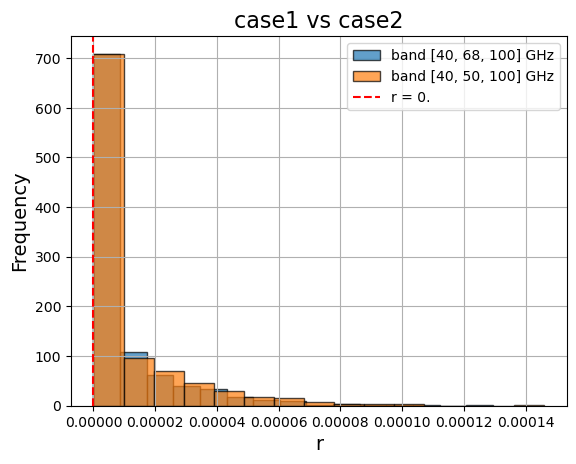

In [8]:
using PyPlot 

# histogram
hist(r_array_case1, bins = 15, alpha = 0.7, edgecolor = "black", label = "band [40, 68, 100] GHz")
hist(r_array_case2, bins = 15, alpha = 0.7, edgecolor = "black", label = "band [40, 50, 100] GHz")

# r = 0.01
PyPlot.axvline(x = 0., color = "red", linestyle = "--", label = "r = 0.")

title("case1 vs case2", fontsize = 16)
xlabel("r", fontsize = 14)
ylabel("Frequency", fontsize = 14)
PyPlot.grid(true)
PyPlot.legend()

show()

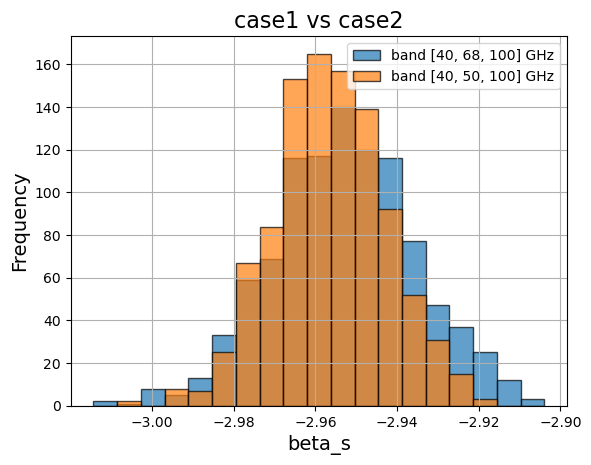

In [11]:
using PyPlot 

min_range = minimum([beta_array_case1; beta_array_case2])
max_range = maximum([beta_array_case1; beta_array_case2])
bins = range(min_range, stop = max_range, length=20)

# beta_s = -2.99
PyPlot.axvline(x = -2.99, color = "red", linestyle = "--", label = "beta_s = -2.99")

# histogram
hist(beta_array_case1, bins = bins, alpha = 0.7, edgecolor = "black", label = "band [40, 68, 100] GHz")
hist(beta_array_case2, bins = bins, alpha = 0.7, edgecolor = "black", label = "band [40, 50, 100] GHz")

title("case1 vs case2", fontsize = 16)
xlabel("beta_s", fontsize = 14)
ylabel("Frequency", fontsize = 14)
PyPlot.grid(true)
PyPlot.legend()

show()

In [9]:
std(r_array_case1) * 1.96
std(r_array_case2) * 1.96

3.510125498494285e-5

In [10]:
# 68%CL Δr
println("Δr_case1 =", std(r_array_case1))
println("Δr_case2 =", std(r_array_case2))

Δr_case1 =1.6229725057267267e-5
Δr_case2 =1.790880356374635e-5


In [ ]:
# 68%CL Δbeta_s
println("Δbeta_s_case1 =", std(beta_s_array_case1))
println("Δbeta_s_case2 =", std(beta_s_array_case2))

In [12]:
println("case1 r = ", mean(r_array_case1))
println("case2 r = ", mean(r_array_case2))

case1 r = 8.668292602966417e-6
case2 r = 9.99814627587936e-6


In [13]:
println("case1 beta = ", mean(beta_array_case1))
println("case2 beta = ", mean(beta_array_case2))

case1 beta = -2.953083432414475
case2 beta = -2.9563873000365835
